In [1]:
import pandas as pd

In [2]:
from sklearn.cluster import OPTICS
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
from utils.functions_08 import plot_dsc_values_with_mean
from utils.functions_08 import analyze_clusters_with_percentages

### Import der Messwerte

In [5]:
df_experiments = pd.read_csv("data/Experiments_2nd_Heating.csv", index_col = 0)
df_experiments

,0-PE-10,0-PE-11,0-PE-12,0-PE-13,0-PE-14,0-PE-15,0-PE-16,0-PE-17,0-PE-18,0-PE-19,...,UV-PET-59,UV-PET-6,UV-PET-60,UV-PET-7,UV-PET-76,UV-PET-77,UV-PET-78,UV-PET-79,UV-PET-8,UV-PET-9
Temp./°C,,,,,,,,,,,,,,,,,,,,,
-25,3.94766,3.91972,4.05790,4.13289,3.82275,4.00157,4.18087,3.91814,4.97739,4.22145,...,3.95683,1.88544,4.02637,2.17032,2.98046,2.88987,3.46959,3.40215,1.70131,1.87894
-24,3.95250,3.92429,4.06407,4.14106,3.82973,3.99952,4.19073,3.92699,4.99383,4.22974,...,3.97837,1.88835,4.03066,2.16730,2.98969,2.89599,3.47728,3.39419,1.70440,1.86790
-23,3.95307,3.92736,4.06864,4.15010,3.83740,4.01068,4.19749,3.93712,4.98818,4.23567,...,3.97614,1.88846,4.05506,2.17359,2.99713,2.90810,3.48758,3.40015,1.71841,1.87305
-22,3.96356,3.93813,4.07811,4.15815,3.84421,4.01827,4.20877,3.94424,5.00459,4.25181,...,3.99298,1.87911,4.05299,2.16390,3.00757,2.92446,3.49876,3.42468,1.70963,1.87415
-21,3.97627,3.94550,4.09258,4.17234,3.85675,4.03683,4.21752,3.95309,5.01714,4.25870,...,4.01335,1.88492,4.05911,2.17059,3.01472,2.91728,3.50415,3.43563,1.71217,1.88214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,6.77143,6.85277,7.17616,7.23334,6.77260,7.11991,7.26021,7.18403,8.81364,7.51063,...,7.44245,2.85871,7.61240,3.09266,5.56269,5.37605,6.44393,6.29337,2.52425,2.69898
271,6.78967,6.87615,7.19767,7.24583,6.79039,7.13805,7.27224,7.20013,8.83735,7.52670,...,7.45806,2.86621,7.63346,3.09930,5.57293,5.37883,6.45563,6.30691,2.53141,2.70881
272,6.80702,6.89665,7.21424,7.25314,6.81041,7.15291,7.27928,7.21753,8.85928,7.54118,...,7.47667,2.87413,7.64855,3.10573,5.58632,5.39402,6.47043,6.31307,2.53573,2.71216


### Daten

In [7]:
file_path_data = "data/052_Data_2st_Heating_PE.csv"

df_data = pd.read_csv(file_path_data)
df_data

,Sample Name,Name of Original DSC Measurement,Mass in mg,∆Hm in Jg-1,Segment,Polymer,TStart in °C,TEnd in °C,Tm in °C,Tm,Hm,Modality,Tail,Shoulder,Aging Level
0,0-PE-1_1,0-PE-6,1.17,108.10,2nd Heating,PE,50.0,118.380,107.7,108,8.79001,sharp,left,undefined,Pristine LDPE and PET
1,0-PE-1_2,0-PE-7,1.22,107.90,2nd Heating,PE,50.0,119.300,107.7,108,8.76131,sharp,left,undefined,Pristine LDPE and PET
2,0-PE-1_3,0-PE-8,1.19,108.10,2nd Heating,PE,50.0,118.900,107.6,108,8.71668,sharp,left,undefined,Pristine LDPE and PET
3,0-PE-1_4,0-PE-9,1.27,109.40,2nd Heating,PE,50.0,118.200,107.7,108,8.40655,sharp,left,undefined,Pristine LDPE and PET
4,0-PE-1_5,0-PE-10,1.41,107.10,2nd Heating,PE,50.0,119.000,107.8,108,7.96444,sharp,left,undefined,Pristine LDPE and PET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,3-EBT-PE-4_1,eb-PE-56,1.34,75.67,2nd Heating,PE,52.5,111.680,93.4,93,6.68234,wide,left,undefined,Third EBT
133,3-EBT-PE-4_2,eb-PE-57,1.38,74.97,2nd Heating,PE,55.0,109.080,93.6,94,6.46357,wide,left,undefined,Third EBT
134,3-EBT-PE-4_3,eb-PE-58,1.35,75.39,2nd Heating,PE,55.0,112.292,93.2,93,6.72744,wide,left,undefined,Third EBT
135,3-EBT-PE-4_4,eb-PE-59,1.36,72.86,2nd Heating,PE,54.6,112.900,93.4,93,6.29116,wide,left,undefined,Third EBT


In [8]:
df_data["Aging Level"].value_counts()

Aging Level
Second UV-cycle (8 weeks irradiation)    20
Third UV-cycle (12 weks irradiation)     20
First EBT                                20
Third EBT                                20
Pristine LDPE and PET                    19
First UV-cycle (4 weeks irradiation)     19
Second EBT                               19
Name: count, dtype: int64

In [9]:
df_data.dtypes

Sample Name                          object
Name of Original DSC Measurement     object
Mass in mg                          float64
∆Hm in Jg-1                         float64
Segment                              object
Polymer                              object
TStart in °C                        float64
TEnd in °C                          float64
Tm in °C                            float64
Tm                                    int64
Hm                                  float64
Modality                             object
Tail                                 object
Shoulder                             object
Aging Level                          object
dtype: object

## Für '∆Hm in Jg-1', 'TStart in °C', 'TEnd in °C',  'Tm in °C', Hm, Modality 

In [11]:
# Modality in numerische Werte umwandeln
df_data['Modality_numeric'] = df_data['Modality'].astype('category').cat.codes
df_data

,Sample Name,Name of Original DSC Measurement,Mass in mg,∆Hm in Jg-1,Segment,Polymer,TStart in °C,TEnd in °C,Tm in °C,Tm,Hm,Modality,Tail,Shoulder,Aging Level,Modality_numeric
0,0-PE-1_1,0-PE-6,1.17,108.10,2nd Heating,PE,50.0,118.380,107.7,108,8.79001,sharp,left,undefined,Pristine LDPE and PET,1
1,0-PE-1_2,0-PE-7,1.22,107.90,2nd Heating,PE,50.0,119.300,107.7,108,8.76131,sharp,left,undefined,Pristine LDPE and PET,1
2,0-PE-1_3,0-PE-8,1.19,108.10,2nd Heating,PE,50.0,118.900,107.6,108,8.71668,sharp,left,undefined,Pristine LDPE and PET,1
3,0-PE-1_4,0-PE-9,1.27,109.40,2nd Heating,PE,50.0,118.200,107.7,108,8.40655,sharp,left,undefined,Pristine LDPE and PET,1
4,0-PE-1_5,0-PE-10,1.41,107.10,2nd Heating,PE,50.0,119.000,107.8,108,7.96444,sharp,left,undefined,Pristine LDPE and PET,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,3-EBT-PE-4_1,eb-PE-56,1.34,75.67,2nd Heating,PE,52.5,111.680,93.4,93,6.68234,wide,left,undefined,Third EBT,2
133,3-EBT-PE-4_2,eb-PE-57,1.38,74.97,2nd Heating,PE,55.0,109.080,93.6,94,6.46357,wide,left,undefined,Third EBT,2
134,3-EBT-PE-4_3,eb-PE-58,1.35,75.39,2nd Heating,PE,55.0,112.292,93.2,93,6.72744,wide,left,undefined,Third EBT,2
135,3-EBT-PE-4_4,eb-PE-59,1.36,72.86,2nd Heating,PE,54.6,112.900,93.4,93,6.29116,wide,left,undefined,Third EBT,2


In [12]:
# Merkmalsauswahl
features = ['∆Hm in Jg-1', 'TStart in °C', 'TEnd in °C', 'Tm in °C', 'Hm', 'Modality_numeric']
X = df_data[features]

# Entfernen von NaN-Werten (falls vorhanden)
X = X.dropna()

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# OPTICS Clustering
optics_model = OPTICS(min_samples=4, xi=0.06, min_cluster_size=10)
clusters = optics_model.fit_predict(X_scaled)

# Ergebnisse in den DataFrame hinzufügen
df_data = df_data.loc[X.index]  # Reihen anpassen
df_data['Cluster'] = clusters

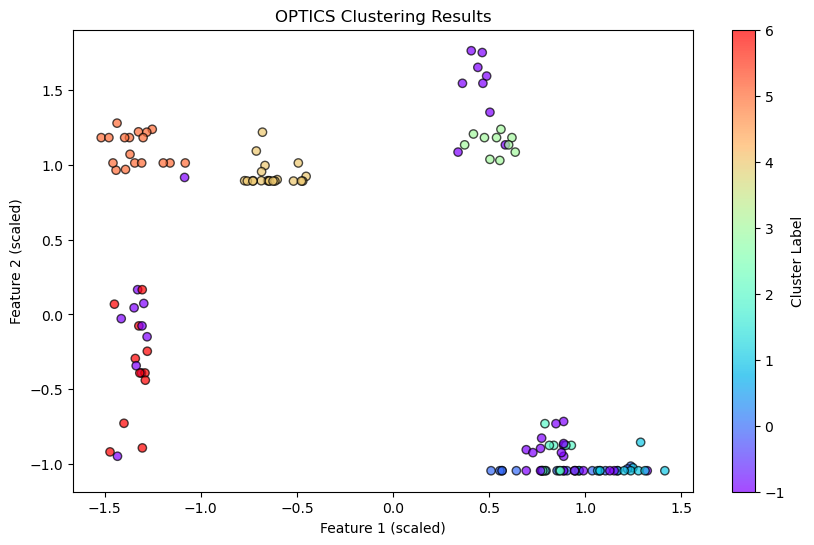

In [13]:
# Scatterplot der Clusterergebnisse
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='rainbow', alpha=0.7, edgecolors='k')
plt.title('OPTICS Clustering Results')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.colorbar(label='Cluster Label')
plt.show()

In [14]:
cluster_dict = df_data.groupby("Cluster")["Name of Original DSC Measurement"].apply(list).to_dict()


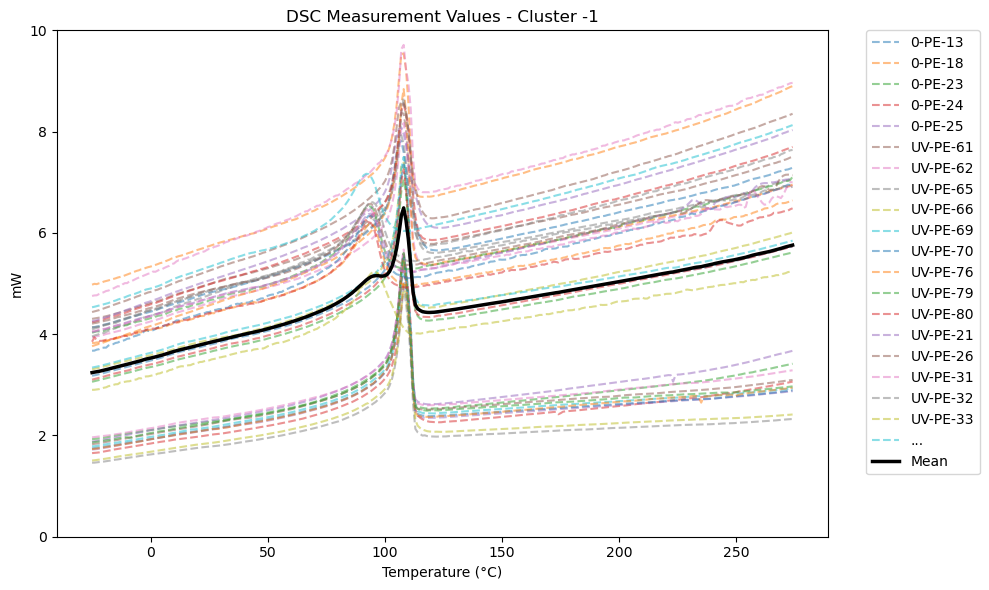

Aging Level
First UV-cycle (4 weeks irradiation)     9
Second UV-cycle (8 weeks irradiation)    9
Third EBT                                9
Pristine LDPE and PET                    5
Third UV-cycle (12 weks irradiation)     5
Second EBT                               1
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------


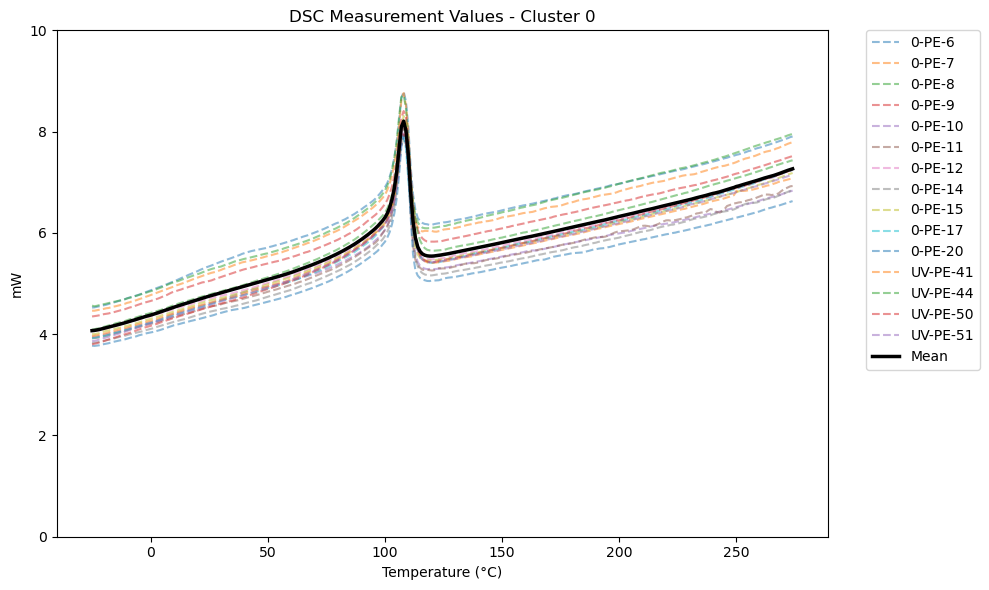

Aging Level
Pristine LDPE and PET                   11
Third UV-cycle (12 weks irradiation)     4
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------


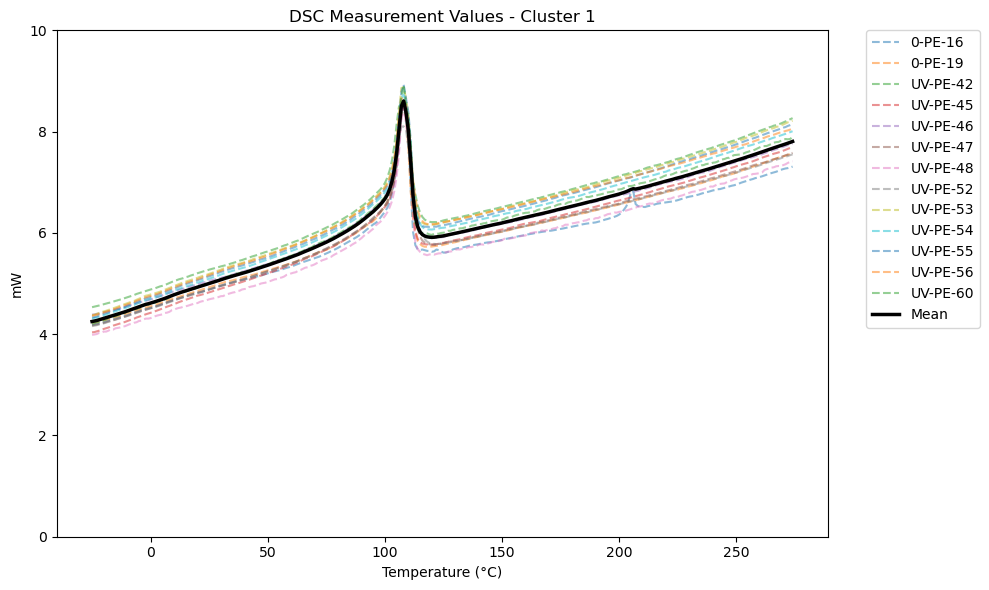

Aging Level
Third UV-cycle (12 weks irradiation)    11
Pristine LDPE and PET                    2
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------


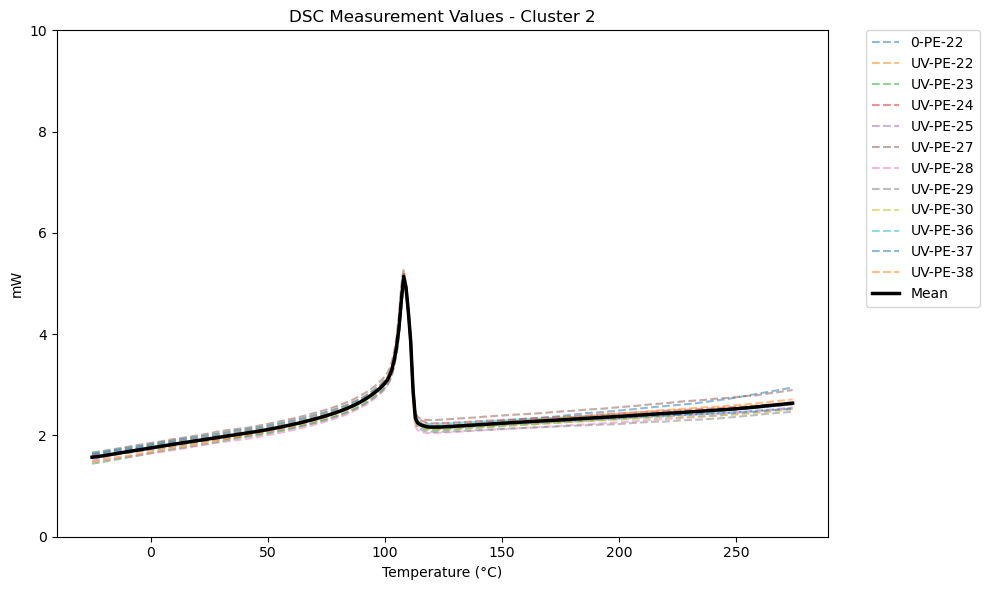

Aging Level
Second UV-cycle (8 weeks irradiation)    11
Pristine LDPE and PET                     1
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------


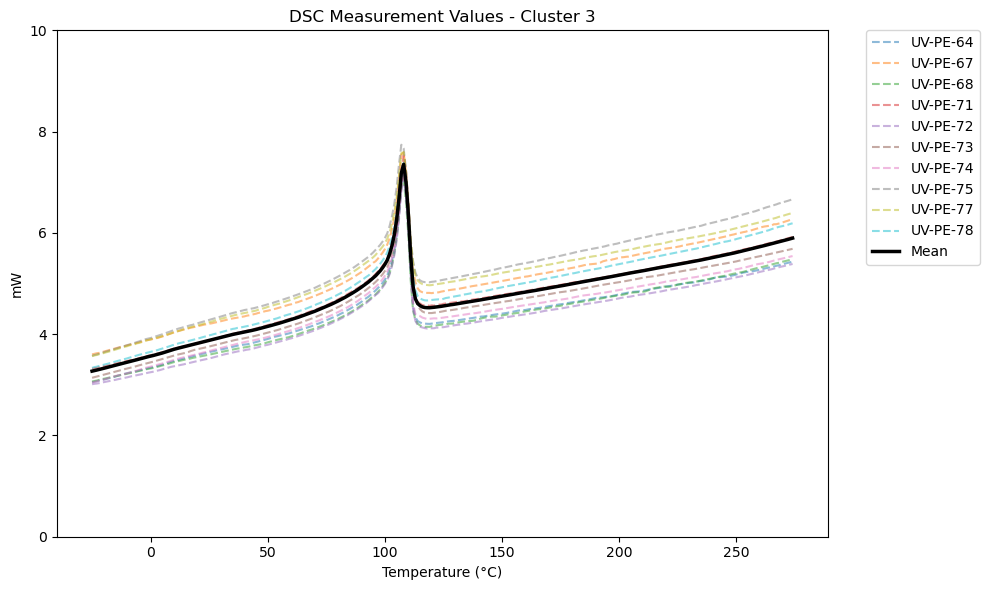

Aging Level
First UV-cycle (4 weeks irradiation)    10
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------


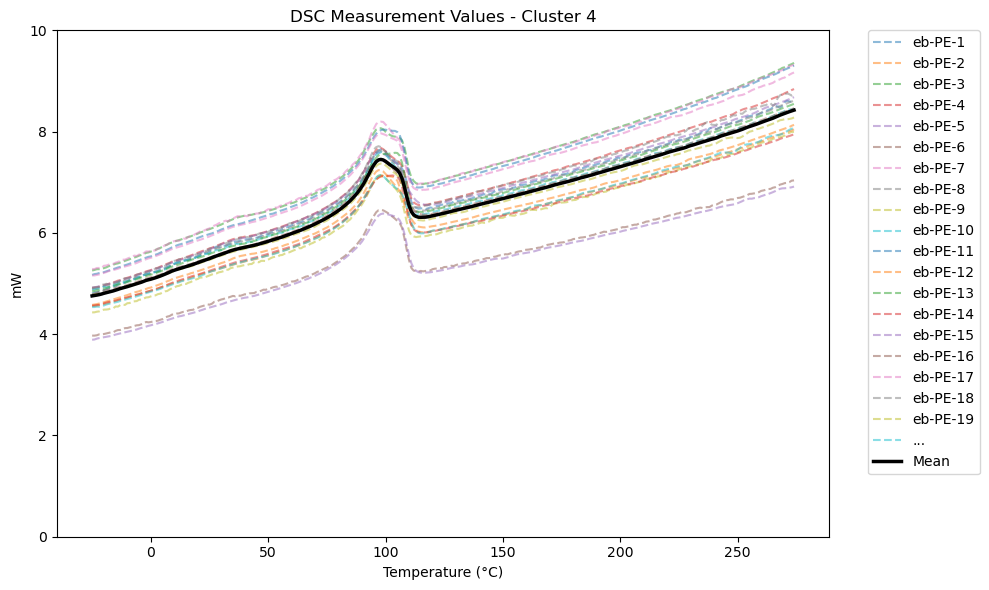

Aging Level
First EBT    20
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------


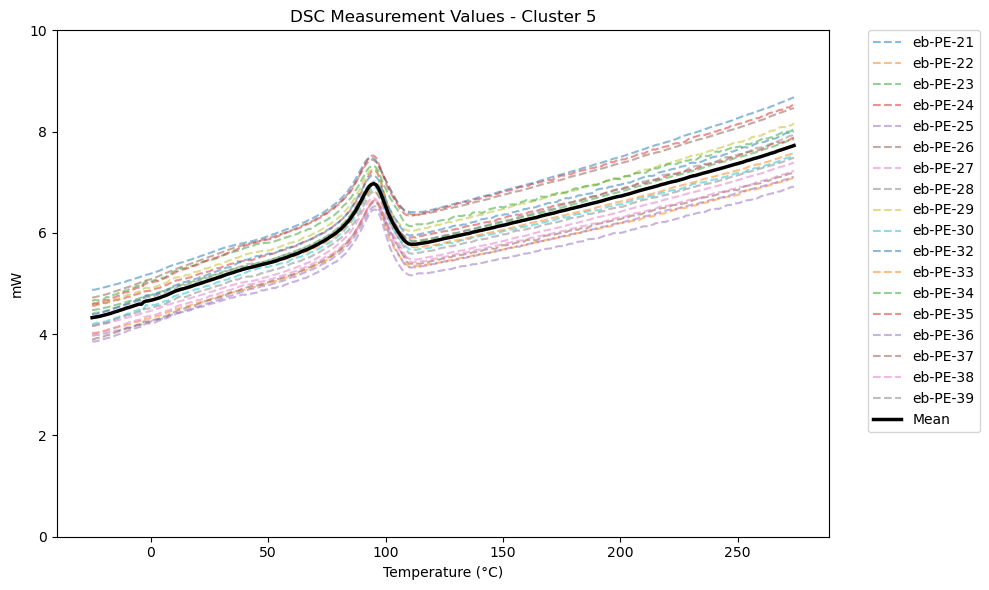

Aging Level
Second EBT    18
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------


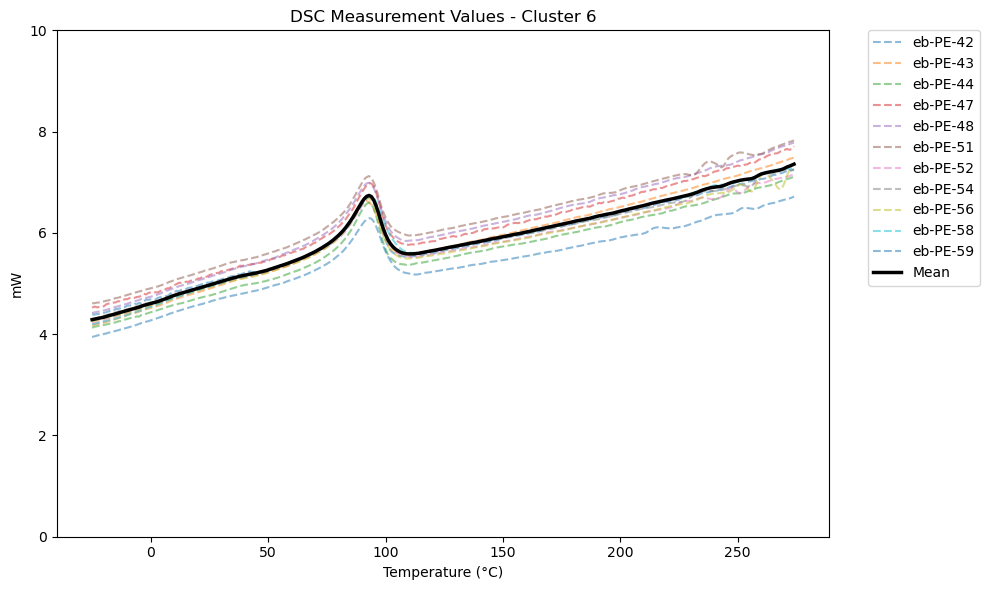

Aging Level
Third EBT    11
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------


In [15]:
for cluster, samples in cluster_dict.items():
    # Filtere gültige Samples
    valid_samples = [sample for sample in samples if sample in df_experiments.columns]

    # Plot nur für gültige Samples
    if valid_samples:
        title = f"DSC Measurement Values - Cluster {cluster}"
        plot_dsc_values_with_mean(df_experiments, valid_samples, title=title, y_min=0, y_max=10)

        # Filter df_data nach valid_samples und berechne value_counts für "Aging Level"
        #filtered_df = df_data[df_data["Name of Original DSC Measurement"].isin(valid_samples)]

        #aging_level_counts = filtered_df["Aging Level"].value_counts()
        #print(aging_level_counts)
        #print("---" * 40)
        
        filtered_df = df_data[df_data["Name of Original DSC Measurement"].isin(samples)]
        aging_level_counts = filtered_df["Aging Level"].value_counts()
        print(aging_level_counts)
        print("---" * 40)
           
        
        
    else:
        print(f"No valid samples found for Cluster {cluster}.")
